Environnement virtuel dans /IA

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/survey.csv")

# Compréhension des données

In [4]:
df.head()
# Lecture en parallèle de la définition des colonnes

,"Timestamp""",Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

In [8]:
df.dtypes

Timestamp"                   object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

# Nettoyage des données

## Valeurs dupliquées

In [9]:
df.duplicated().sum()

0

## Valeurs manquantes

In [10]:
df.isnull().sum()

Timestamp"                      0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### State

In [11]:
df["Country"].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

Il n'y a pas assez de données pour représenter les différents pays, particulièrement si on souhaite développer une application en France (13 valeurs). On va donc supprimer Country et state

In [12]:
df.head()

,"Timestamp""",Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Self employed

In [13]:
df["self_employed"].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

Les gens qui n'ont rien répondu ne savaient probablement pas trop quoi mettre, nous allons rajouter une catégorie "Other"

In [14]:
df["self_employed"].fillna("Other", inplace=True)

/tmp/ipykernel_11435/624758322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["self_employed"].fillna("Other", inplace=True)


### Work interfere

In [15]:
# Variable de sortie
df["treatment"].value_counts()

treatment
Yes    637
No     622
Name: count, dtype: int64

In [16]:
df.groupby('treatment')['work_interfere'].apply(lambda x: x.isna().sum())

treatment
No     260
Yes      4
Name: work_interfere, dtype: int64

Les gens qui n'ont jamais cherché de traitement se sentent généralement moins concernés par cette question, ils n'ont pas tous de problèmes de santé mentale.
On peut remplacer les valeurs manquantes par "Not concerned"

In [17]:
df["work_interfere"].fillna("Not concerned", inplace=True)

/tmp/ipykernel_11435/1132174015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["work_interfere"].fillna("Not concerned", inplace=True)


### Comments

Les commentaires seraient très laborieux à intégrer dans un algorithme de prédiction, de plus il y a beaucoup de valeurs manquantes (1100 / 1200). Ils seront à supprimer avec les autres colonnes.

In [18]:
df.isna().sum()

Timestamp"                      0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## Suppression des colonnes et lignes inintéressantes

### Colonnes

In [19]:
# Suppression des colonnes qui ne nous intéressent pas
df.columns

Index(['Timestamp"', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [20]:
deleted_columns = ['Timestamp"', "Country", "state", "comments"]
df = df.drop(deleted_columns, axis=1)

### Lignes

In [21]:
df["Age"].value_counts(ascending=True) 

Age
 72              1
 329             1
 99999999999     1
-1               1
 62              1
 65              1
-1726            1
 58              1
 11              1
 5               1
 8               1
-29              1
 53              1
 61              1
 47              2
 60              2
 57              3
 55              3
 54              3
 56              4
 49              4
 51              5
 20              6
 48              6
 50              6
 18              7
 19              9
 44             11
 45             12
 46             12
 21             16
 42             20
 22             21
 41             21
 43             28
 40             33
 39             33
 36             37
 38             39
 37             43
 24             46
 23             51
 35             55
 25             61
 30             63
 34             65
 31             67
 28             68
 33             70
 27             71
 26             75
 32             82
 29     

In [22]:
# On supprime les lignes pour lesquelles l'age est mauvais
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

## Ingénierie de colonne

### Réunification des termes de la colonne genre

In [23]:
df["Gender"].value_counts()

Gender
Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Female                                              2
Cis Male                                            2
Man                                                 2
msle                                                1
male leaning androgynous                            1
Cis Man                                             1
Trans woman          

In [24]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [25]:
def grouper_genres(genre):

    ancien_genre = genre.lower()

    if ancien_genre in ['male', 'm', 'man', "male ", "man"]:
        nouveau_genre = "Male"
    elif ancien_genre in ['female', 'f', 'woman', "female "]:
        nouveau_genre = "Female"
    else:
        nouveau_genre = "Other"
    return nouveau_genre

df["Gender"] = df["Gender"].apply(grouper_genres)

df["Gender"].value_counts()

Gender
Male      973
Female    242
Other      39
Name: count, dtype: int64

# Analyse de la distribution des colonnes

In [26]:
def fonction_plot_value_count(colonne):
    print(df[colonne].value_counts())
    df[colonne].value_counts().sort_values().plot(kind='bar', figsize=(4,3)) 

treatment
Yes    633
No     621
Name: count, dtype: int64


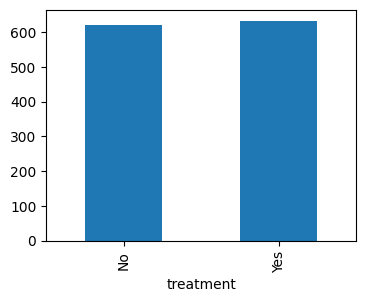

In [27]:
# Variable cible
fonction_plot_value_count("treatment")

self_employed
No       1092
Yes       144
Other      18
Name: count, dtype: int64


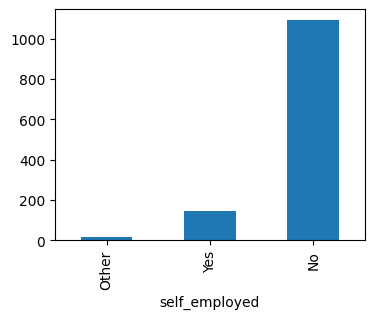

In [28]:
fonction_plot_value_count("self_employed")

family_history
No     764
Yes    490
Name: count, dtype: int64


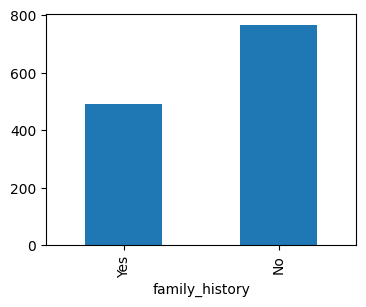

In [29]:
fonction_plot_value_count("family_history")

work_interfere
Sometimes        464
Not concerned    263
Never            213
Rarely           173
Often            141
Name: count, dtype: int64


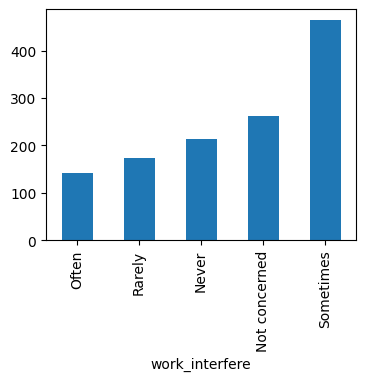

In [30]:
fonction_plot_value_count("work_interfere")

no_employees
6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: count, dtype: int64


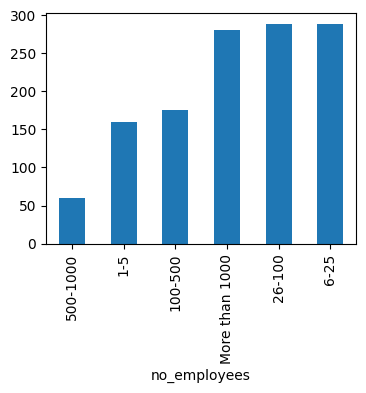

In [31]:
fonction_plot_value_count("no_employees")

remote_work
No     881
Yes    373
Name: count, dtype: int64


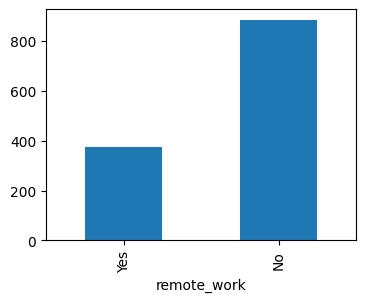

In [70]:
fonction_plot_value_count("remote_work")

tech_company
Yes    1028
No      226
Name: count, dtype: int64


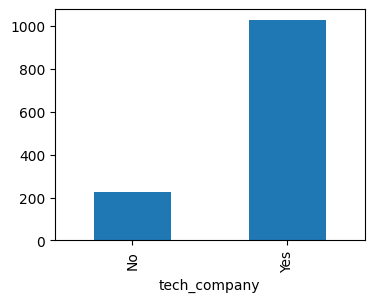

In [33]:
fonction_plot_value_count("tech_company")

benefits
Yes           474
Don't know    408
No            372
Name: count, dtype: int64


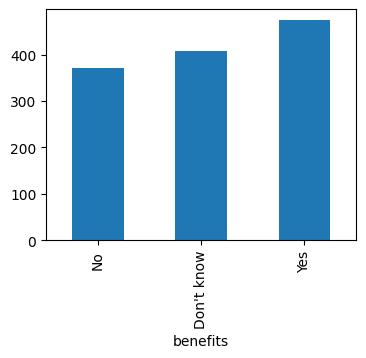

In [34]:
fonction_plot_value_count("benefits")

care_options
No          499
Yes         441
Not sure    314
Name: count, dtype: int64


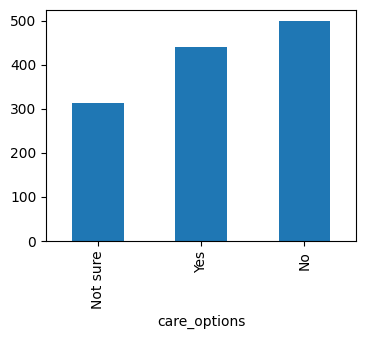

In [35]:
fonction_plot_value_count("care_options")

wellness_program
No            839
Yes           228
Don't know    187
Name: count, dtype: int64


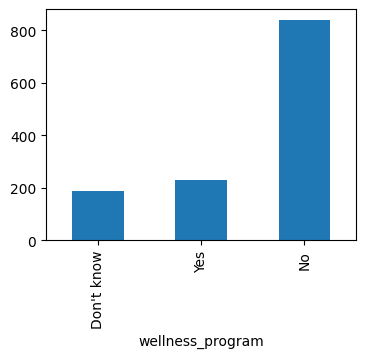

In [36]:
fonction_plot_value_count("wellness_program")

seek_help
No            643
Don't know    363
Yes           248
Name: count, dtype: int64


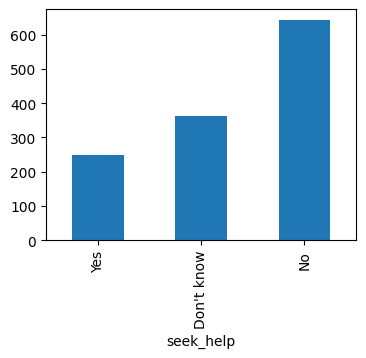

In [37]:
fonction_plot_value_count("seek_help")

anonymity
Don't know    816
Yes           374
No             64
Name: count, dtype: int64


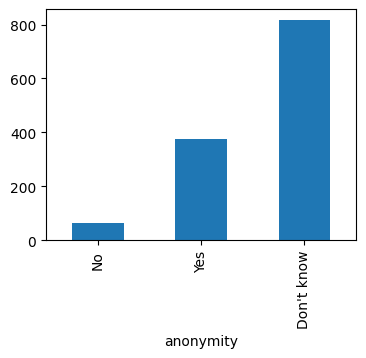

In [38]:
fonction_plot_value_count("anonymity")

leave
Don't know            561
Somewhat easy         266
Very easy             205
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64


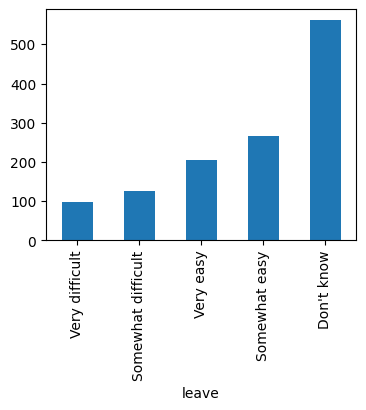

In [39]:
fonction_plot_value_count("leave")

mental_health_consequence
No       489
Maybe    476
Yes      289
Name: count, dtype: int64


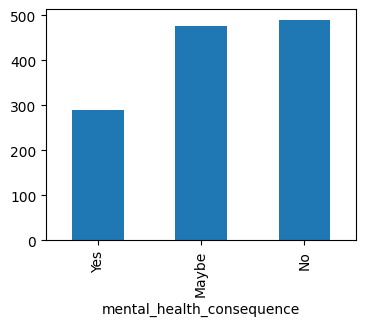

In [40]:
fonction_plot_value_count("mental_health_consequence")

phys_health_consequence
No       922
Maybe    273
Yes       59
Name: count, dtype: int64


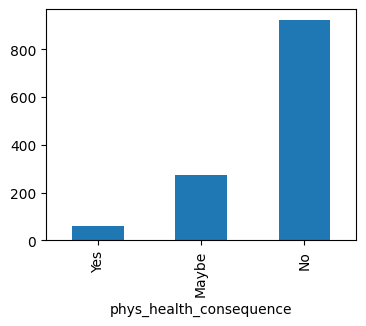

In [41]:
fonction_plot_value_count("phys_health_consequence")

coworkers
Some of them    772
No              258
Yes             224
Name: count, dtype: int64


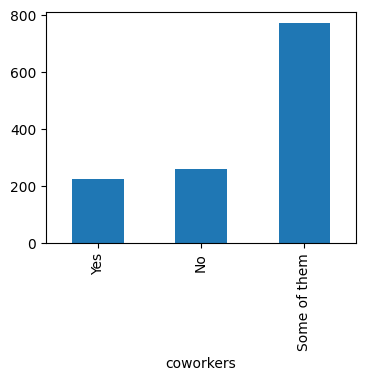

In [42]:
fonction_plot_value_count("coworkers")

supervisor
Yes             514
No              390
Some of them    350
Name: count, dtype: int64


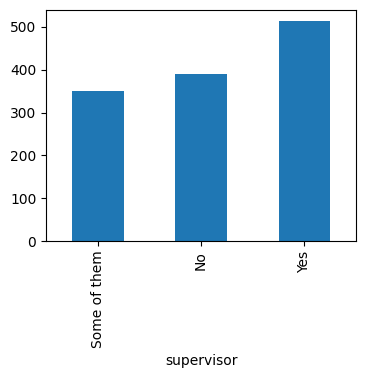

In [43]:
fonction_plot_value_count("supervisor")

mental_health_interview
No       1005
Maybe     207
Yes        42
Name: count, dtype: int64


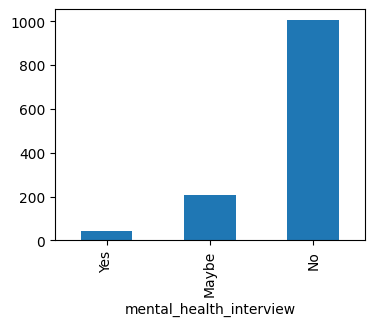

In [44]:
fonction_plot_value_count("mental_health_interview")

phys_health_interview
Maybe    556
No       497
Yes      201
Name: count, dtype: int64


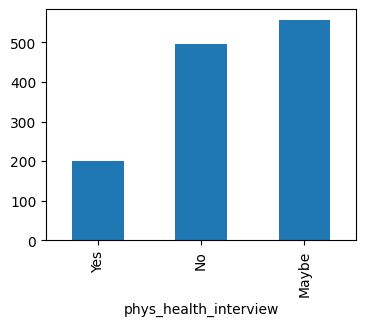

In [45]:
fonction_plot_value_count("phys_health_interview")

mental_vs_physical
Don't know    574
Yes           342
No            338
Name: count, dtype: int64


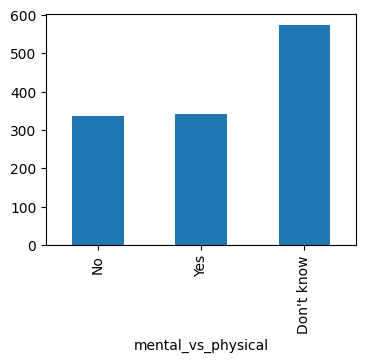

In [46]:
fonction_plot_value_count("mental_vs_physical")

obs_consequence
No     1072
Yes     182
Name: count, dtype: int64


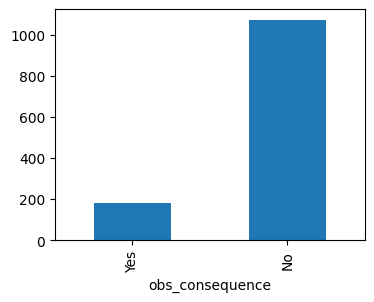

In [47]:
fonction_plot_value_count("obs_consequence")

In [48]:
df["Age"].value_counts(ascending=True)

Age
72     1
11     1
62     1
65     1
5      1
58     1
61     1
8      1
53     1
47     2
60     2
54     3
57     3
55     3
49     4
56     4
51     5
50     6
48     6
20     6
18     7
19     9
44    11
46    12
45    12
21    16
42    20
22    21
41    21
43    28
39    33
40    33
36    37
38    39
37    43
24    46
23    51
35    55
25    61
30    63
34    65
31    67
28    68
33    70
27    71
26    75
32    82
29    85
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

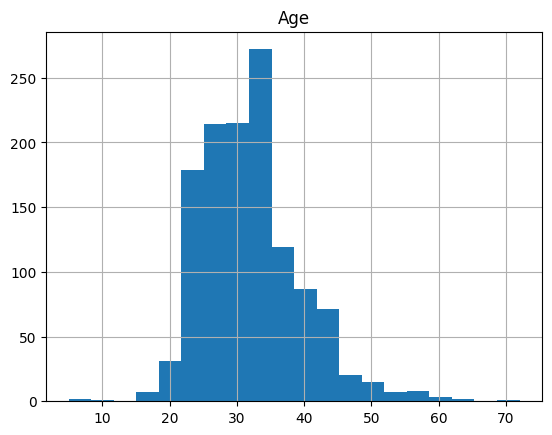

In [49]:
df.hist(column=["Age"], bins=20)

In [50]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,Other,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,Other,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Other,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Other,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,Other,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Analyse de la relation des colonnes entre elles

### Entre variables explicatives

In [51]:
df.groupby("benefits")["care_options"].value_counts()

benefits    care_options
Don't know  No              204
            Not sure        198
            Yes               6
No          No              204
            Yes             144
            Not sure         24
Yes         Yes             291
            Not sure         92
            No               91
Name: count, dtype: int64

La colonne benefits est décrité par : "Does your employer provide mental health benefits?". 
Donc, est-ce que l'employeur fournit des services pour prendre soin de la santé mentale des employés.

### Entre variable cible et variables explicatives

In [52]:
objet = df.apply(lambda x : pd.factorize(x)[0]).corr().abs()["treatment"]
objet_sns = pd.DataFrame(objet)
objet

Age                          0.017263
Gender                       0.145317
self_employed                0.012856
family_history               0.378069
treatment                    1.000000
work_interfere               0.335215
no_employees                 0.049801
remote_work                  0.026919
tech_company                 0.032859
benefits                     0.141503
care_options                 0.242351
wellness_program             0.053808
seek_help                    0.053835
anonymity                    0.099584
leave                        0.060251
mental_health_consequence    0.128113
phys_health_consequence      0.039706
coworkers                    0.030026
supervisor                   0.026823
mental_health_interview      0.089781
phys_health_interview        0.051138
mental_vs_physical           0.060688
obs_consequence              0.154541
Name: treatment, dtype: float64

<Axes: >

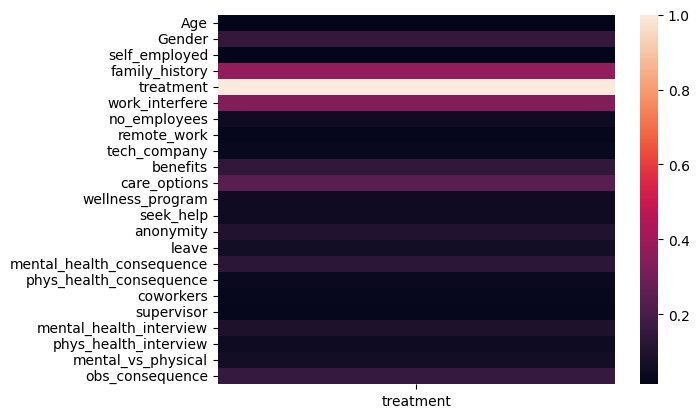

In [53]:
sns.heatmap(objet_sns)

In [54]:
objet_trie = objet.sort_values(ascending=False)
objet_trie = objet_trie.drop(index="treatment")
objet_trie

family_history               0.378069
work_interfere               0.335215
care_options                 0.242351
obs_consequence              0.154541
Gender                       0.145317
benefits                     0.141503
mental_health_consequence    0.128113
anonymity                    0.099584
mental_health_interview      0.089781
mental_vs_physical           0.060688
leave                        0.060251
seek_help                    0.053835
wellness_program             0.053808
phys_health_interview        0.051138
no_employees                 0.049801
phys_health_consequence      0.039706
tech_company                 0.032859
coworkers                    0.030026
remote_work                  0.026919
supervisor                   0.026823
Age                          0.017263
self_employed                0.012856
Name: treatment, dtype: float64

<Axes: >

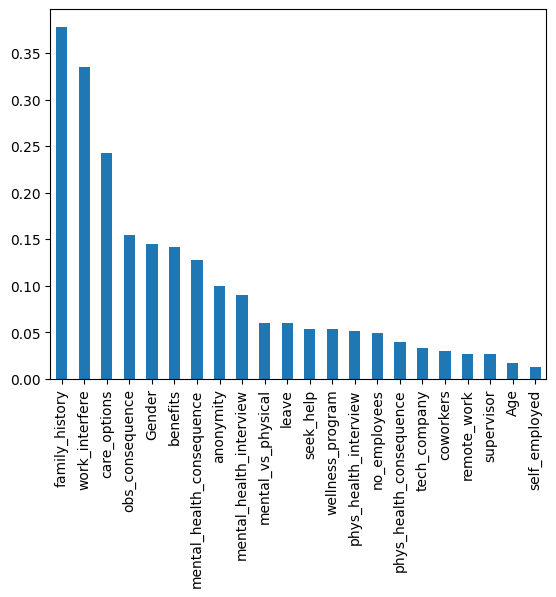

In [55]:
objet_trie.plot(kind="bar")

<Axes: xlabel='family_history', ylabel='count'>

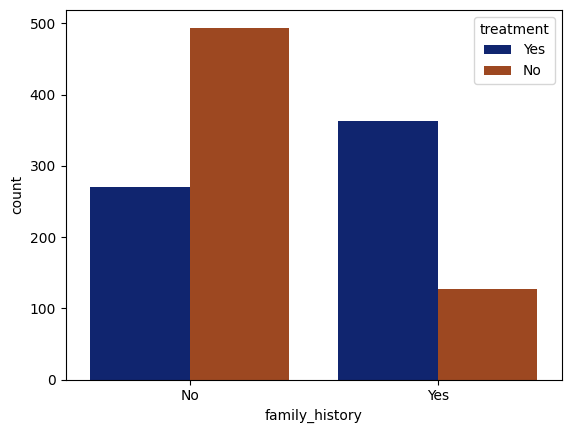

In [56]:
sns.countplot(data=df, x=df["family_history"], hue="treatment", palette="dark")

Les patients ayant des cas de problèmes de santé mentale dans la famille ont plus de chance d'avoir recherché un traitement

In [57]:
result_df = df.groupby("treatment")["work_interfere"].value_counts().unstack()

result_df

work_interfere,Never,Not concerned,Often,Rarely,Sometimes
treatment,,,,,
No,183,259,21,51,107
Yes,30,4,120,122,357


<Axes: xlabel='work_interfere', ylabel='count'>

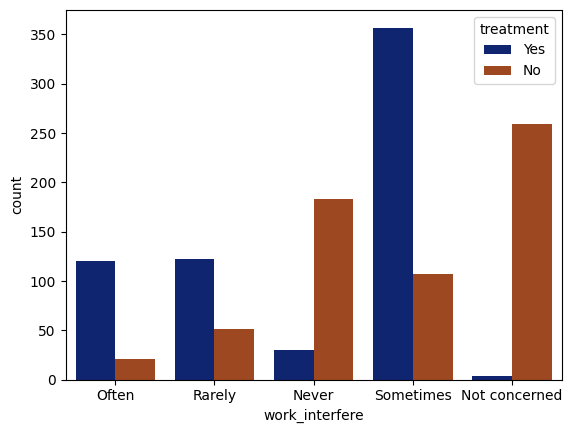

In [58]:
sns.countplot(data=df, x=df["work_interfere"], hue="treatment", palette="dark")

On peut voir que des gens qui n'ont pas cherché de traitement pour des problèmes de santé mentale ont répondu à la question. Cela signifie que ces gens considèrent avoir un problème de santé mentale, mais pas suffisamment handicapant pour chercher un traitement.

Nous voulons un algorithme qui prédise à quel moment un patient devrait chercher un traitement.

On peut voir également que la majorité des gens interviewés considèrent avoir des problèmes de santé mentale.

<Axes: xlabel='care_options', ylabel='count'>

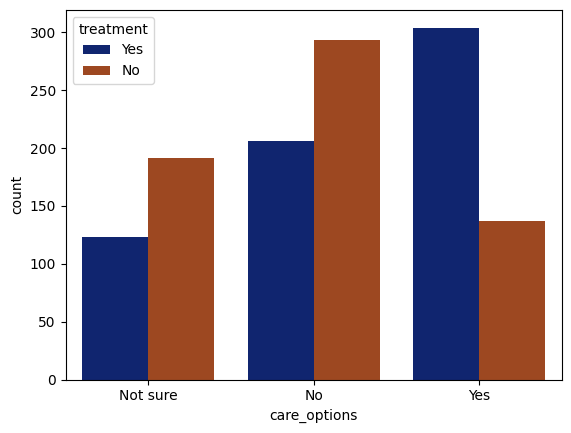

In [59]:
sns.countplot(data=df, x=df["care_options"], hue="treatment", palette="dark")

In [60]:
df.groupby("benefits")["care_options"].value_counts()

benefits    care_options
Don't know  No              204
            Not sure        198
            Yes               6
No          No              204
            Yes             144
            Not sure         24
Yes         Yes             291
            Not sure         92
            No               91
Name: count, dtype: int64

Les gens qui connaissent les services de santé mentale des entreprises pour les employés ont plus souvent fait une demande de traitement.

<Axes: xlabel='obs_consequence', ylabel='count'>

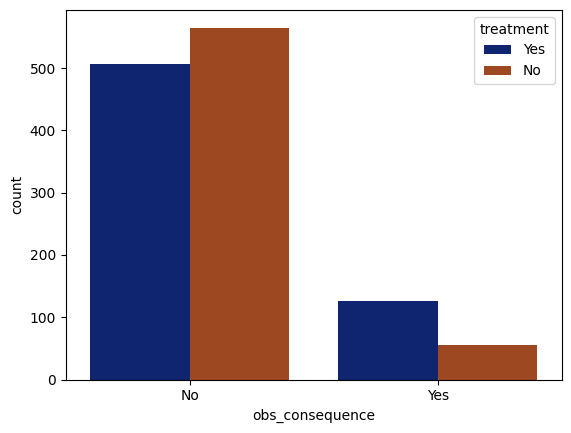

In [61]:
sns.countplot(data=df, x=df["obs_consequence"], hue="treatment", palette="dark")

La proportion de gens qui ont répondu oui ont plus tendance a avoir fait une demande de traitement.

<Axes: xlabel='Gender', ylabel='count'>

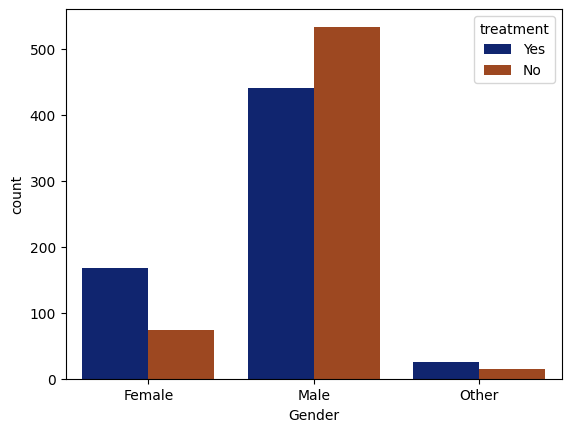

In [62]:
sns.countplot(data=df, x=df["Gender"], hue="treatment", palette="dark")

Les femmes ont plus souvent fait une demande de traitement, ainsi que les personnes ni homme ni femme.

<Axes: xlabel='benefits', ylabel='count'>

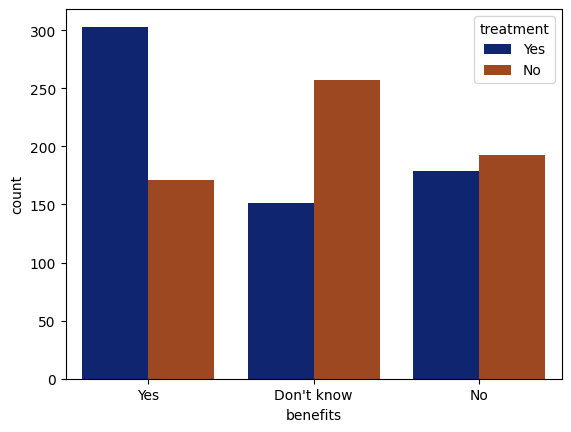

In [63]:
sns.countplot(data=df, x=df["benefits"], hue="treatment", palette="dark")

Les gens qui répondent oui ont plus souvent fait une demande de traitement, sûrement parce qu'ils se sentent davantage concernés, ou parce qu'ils sont sollicités à le faire.

<Axes: xlabel='mental_health_consequence', ylabel='count'>

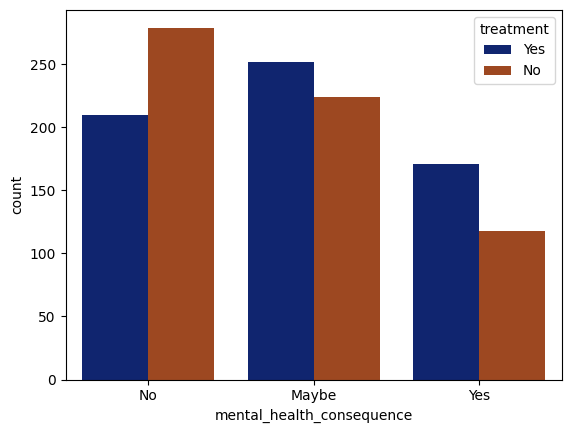

In [64]:
sns.countplot(data=df, x=df["mental_health_consequence"], hue="treatment", palette="dark")

Les gens qui ont déjà recherché un traitement ont plus tendance à penser que de discuter d'un problème de santé mentale avec leur employeur aurait des conséquences négatives.

<Axes: xlabel='anonymity', ylabel='count'>

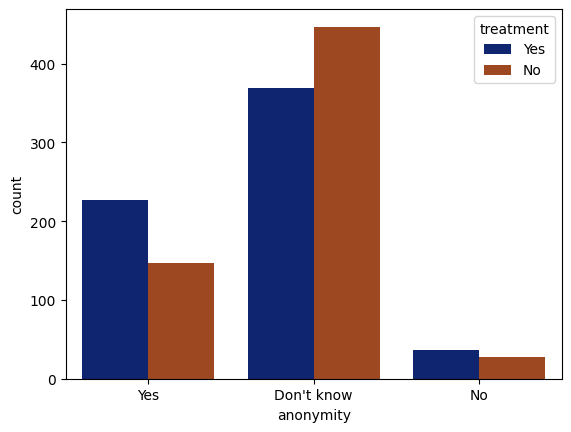

In [65]:
sns.countplot(data=df, x=df["anonymity"], hue="treatment", palette="dark")

<Axes: xlabel='mental_health_interview', ylabel='count'>

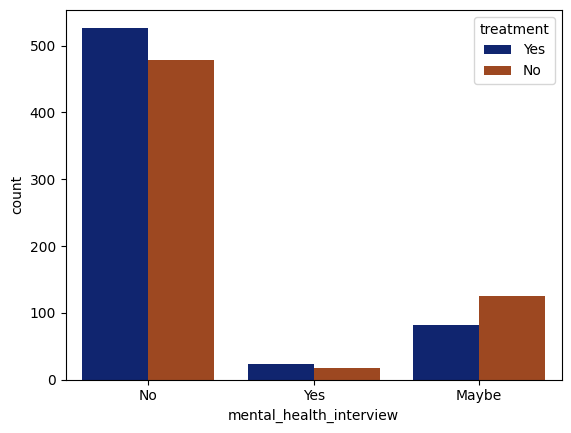

In [66]:
sns.countplot(data=df, x=df["mental_health_interview"], hue="treatment", palette="dark")

### Entre variables

In [67]:
chaleur_objet = df.apply(lambda x : pd.factorize(x)[0]).corr().abs()
# chaleur_objet = chaleur_objet.mask(chaleur_objet <= 0.25)
chaleur_objet

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.028960,0.062854,0.008324,0.017263,0.009500,0.037357,0.028362,0.005183,0.005070,0.019518,0.014375,0.039204,0.009161,0.020198,0.009410,0.035906,0.009094,0.006195,0.012858,0.021885,0.018425,0.083183
Gender,0.028960,1.000000,0.028260,0.120063,0.145317,0.033305,0.087657,0.017184,0.062565,0.130478,0.022000,0.050147,0.048020,0.010631,0.049502,0.052005,0.034787,0.039903,0.075559,0.100041,0.018503,0.017899,0.033272
self_employed,0.062854,0.028260,1.000000,0.002791,0.012856,0.070578,0.208562,0.266357,0.076932,0.207056,0.028670,0.034764,0.092459,0.001898,0.090011,0.085730,0.016928,0.072926,0.053611,0.097136,0.014273,0.081831,0.051600
family_history,0.008324,0.120063,0.002791,1.000000,0.378069,0.141551,0.076486,0.015196,0.049709,0.136265,0.109147,0.028688,0.048802,0.023954,0.008482,0.095667,0.036721,0.010796,0.003822,0.068008,0.037759,0.061176,0.120100
treatment,0.017263,0.145317,0.012856,0.378069,1.000000,0.335215,0.049801,0.026919,0.032859,0.141503,0.242351,0.053808,0.053835,0.099584,0.060251,0.128113,0.039706,0.030026,0.026823,0.089781,0.051138,0.060688,0.154541
work_interfere,0.009500,0.033305,0.070578,0.141551,0.335215,1.000000,0.002081,0.035879,0.038237,0.045699,0.113542,0.019491,0.015635,0.012560,0.006996,0.090858,0.000672,0.050260,0.016868,0.013780,0.006544,0.028374,0.095583
no_employees,0.037357,0.087657,0.208562,0.076486,0.049801,0.002081,1.000000,0.152021,0.023720,0.028979,0.026893,0.021823,0.015550,0.039246,0.067661,0.003350,0.004728,0.008966,0.012489,0.016805,0.024631,0.012092,0.052679
remote_work,0.028362,0.017184,0.266357,0.015196,0.026919,0.035879,0.152021,1.000000,0.132627,0.105307,0.029987,0.045121,0.045756,0.002571,0.095083,0.007939,0.023276,0.047168,0.047285,0.075339,0.017855,0.082464,0.040291
tech_company,0.005183,0.062565,0.076932,0.049709,0.032859,0.038237,0.023720,0.132627,1.000000,0.087871,0.032663,0.116856,0.127868,0.019829,0.032996,0.115776,0.072601,0.040701,0.036843,0.078023,0.034349,0.120362,0.065964
benefits,0.005070,0.130478,0.207056,0.136265,0.141503,0.045699,0.028979,0.105307,0.087871,1.000000,0.087092,0.408209,0.489334,0.244975,0.071339,0.033813,0.060365,0.048269,0.012689,0.037876,0.009271,0.100266,0.035466


<Axes: >

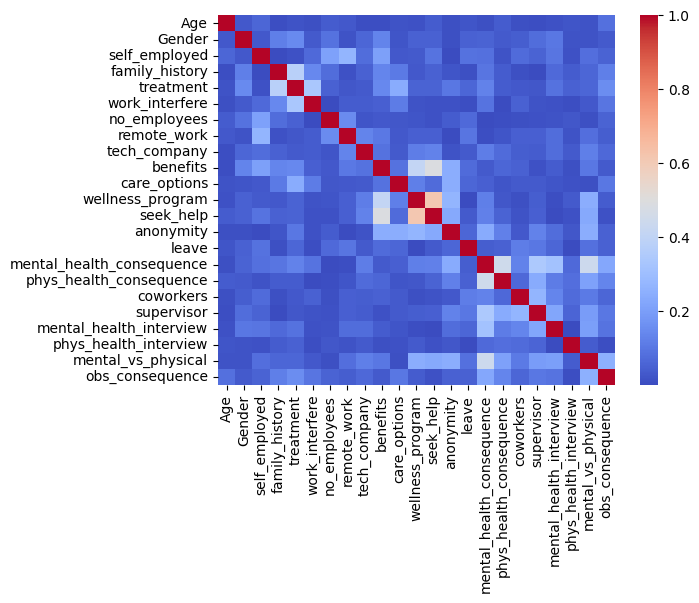

In [68]:
sns.heatmap(chaleur_objet, cmap="coolwarm")

Il y a une forte corrélation entre mental vs physical et wellness program, seek help, anonymity, mental health consequence, physical health consequence, supervisor,  mental health interview. Les questions vont dans le même sens, si l'employeur prend aussi bien au sérieux les problèmes mentaux que physiques, il fera en sorte de mettre à l'aise les employés et de leur donner les outils adaptés pour leur bien être

In [69]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,Other,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,Other,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Other,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Other,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,Other,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
